In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

import btrdb
from btrdb.utils.timez import ns_delta, ns_to_datetime, to_nanoseconds

In [17]:
YOUR_API_KEY = '2301C47D67FB1C2C48D0CC7B'

#Establishing the connecting to the server
db = btrdb.connect("api.ni4ai.org:4411", apikey=YOUR_API_KEY)


In [18]:
streams = db.streams_in_collection('golden')
streams = [s for s in streams if s.name == 'LSTATE']

In [19]:
len(streams)

10

In [20]:
first = np.inf
last = -np.inf
for s in streams:
    (start, val), _ = s.earliest()
    (end, val), _ = s.latest()
    
    if start < first:
        first = int(start)
    if end > last:
        last = int(end)
        

In [46]:
points = s.aligned_windows(first, last, pw)

In [48]:
times, counts = zip(*[(p.time, p.count) for p,_ in points])

In [50]:
len(times), len(counts)

(1226, 1226)

In [68]:
pw = 50
counts = []
for s in streams:
    points = s.aligned_windows(first, last, pw)
    t, c = zip(*[(ns_to_datetime(p.time), p.count) for p, _ in points])
    counts.append(pd.Series(c, index=t))



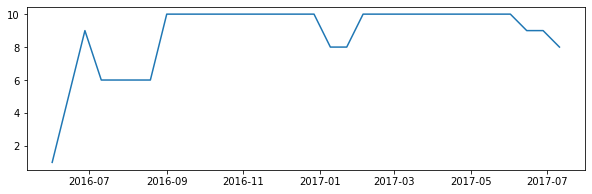

In [75]:
df = pd.concat(counts, axis=1).sort_index().iloc[1:]
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(df.index, pd.notnull(df).sum(axis=1).tolist())
plt.show()

In [23]:
stream_avail = pd.DataFrame(columns=[s.name for s in streams],
                           index=days)
for d in days:
    start = to_nanoseconds(d)
    end = to_nanoseconds(d+timedelta(days=1))
    
    counts = [s.count(start, end) for s in streams]
    stream_avail.loc[d] = counts

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots()
ax.plot(stream_avail)

In [14]:
stream_avail.head()

,C2MAG,LSTATE,LSTATE,L3ANG,L1ANG,L3ANG,L3MAG,L1ANG,L1MAG,C2ANG,...,L3ANG,C3MAG,C3ANG,L1MAG,LSTATE,C3MAG,C2MAG,C2MAG,C2ANG,L1MAG
2000-12-30 23:59:57.008333+00:00,0,120,240,0,240,0,0,0,240,0,...,0,0,120,0,240,0,0,0,0,0
2000-12-31 23:59:57.008333+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2001-01-01 23:59:57.008333+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2001-01-02 23:59:57.008333+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2001-01-03 23:59:57.008333+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
